In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.cluster import KMeans
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
plt.style.use('seaborn-talk')
#plt.style.available

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

In [5]:
data = pd.read_csv('/kaggle/input/assay-of-serum-free-light-chain/flchain.csv').sort_values("sample.yr").reset_index()
data.drop(["Unnamed: 0","index"],axis=1,inplace=True)

In [6]:
data.head()

,age,sex,sample.yr,kappa,lambda,flc.grp,creatinine,mgus,futime,death,chapter
0,55,M,1995,1.51,1.67,7,1.0,0,976,1,Neoplasms
1,72,M,1995,2.39,2.55,10,1.2,0,3316,1,Nervous
2,66,F,1995,1.01,1.39,4,0.7,0,4655,0,NaN
3,79,F,1995,1.12,1.36,4,1.0,0,4961,0,NaN
4,50,F,1995,0.81,0.92,1,0.9,0,4774,0,NaN


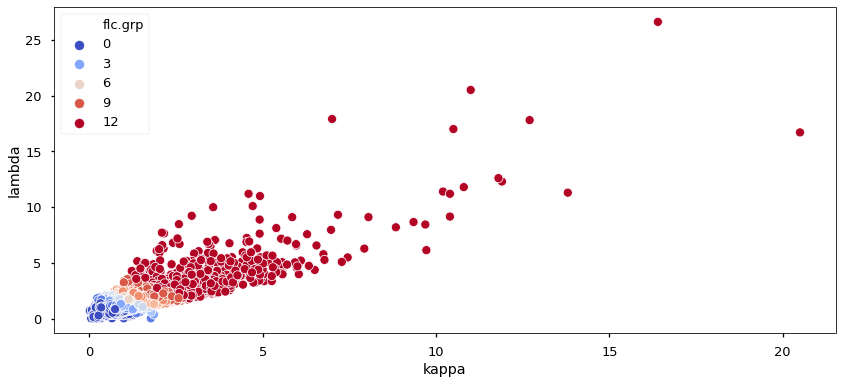

In [7]:
sns.scatterplot(x="kappa" ,y="lambda" ,data=data,hue="flc.grp",palette="coolwarm")
plt.show()

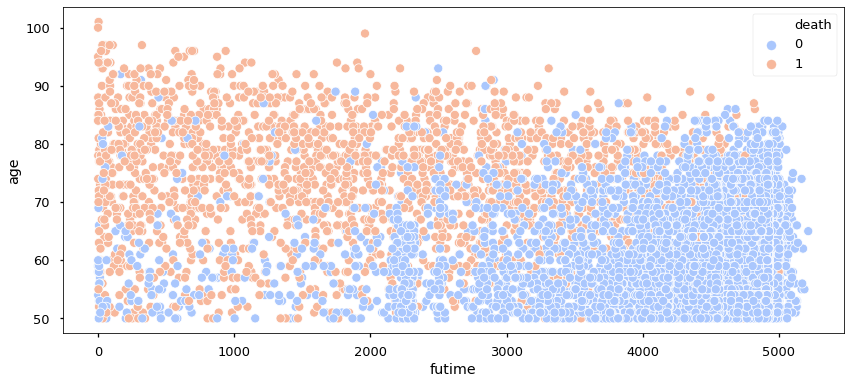

In [8]:
sns.scatterplot(x="futime" ,y="age",data=data,hue="death",palette="coolwarm")
plt.show()

In [9]:
data.shape

(7874, 11)

In [10]:
data["sex"].replace(to_replace=["M","F"],value=[1,0],inplace=True)

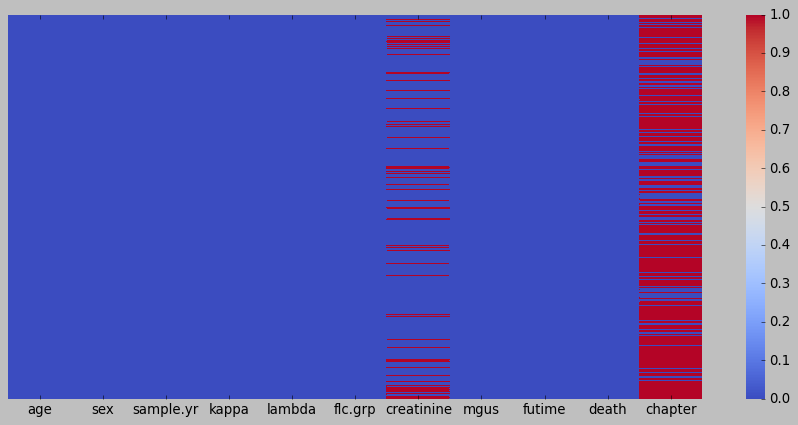

In [11]:
plt.style.use('classic')
rcParams['figure.figsize'] = 14,6
sns.heatmap(data.isnull(),yticklabels=False,cmap="coolwarm");

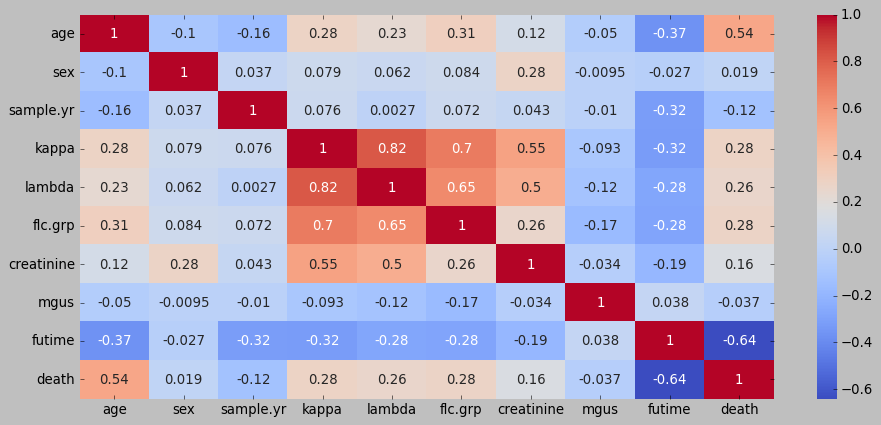

In [12]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.show()

In [13]:
data.isnull().sum()

age              0
sex              0
sample.yr        0
kappa            0
lambda           0
flc.grp          0
creatinine    1350
mgus             0
futime           0
death            0
chapter       5705
dtype: int64

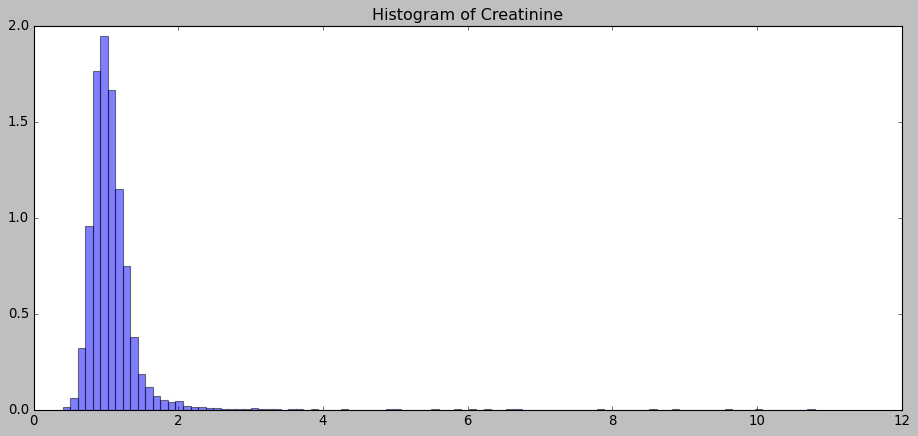

In [14]:
data["creatinine"].fillna("?",inplace=True)
plt.hist(data.loc[data["creatinine"]!="?"]["creatinine"],alpha=0.5,density=True,bins=100)
plt.title("Histogram of Creatinine")
plt.show()

In [15]:
data["chapter"].value_counts()

Circulatory             745
Neoplasms               567
Respiratory             245
Mental                  144
Nervous                 130
External Causes          66
Digestive                66
Endocrine                48
Genitourinary            42
Ill Defined              38
Infectious               32
Injury and Poisoning     21
Musculoskeletal          14
Blood                     4
Skin                      4
Congenital                3
Name: chapter, dtype: int64

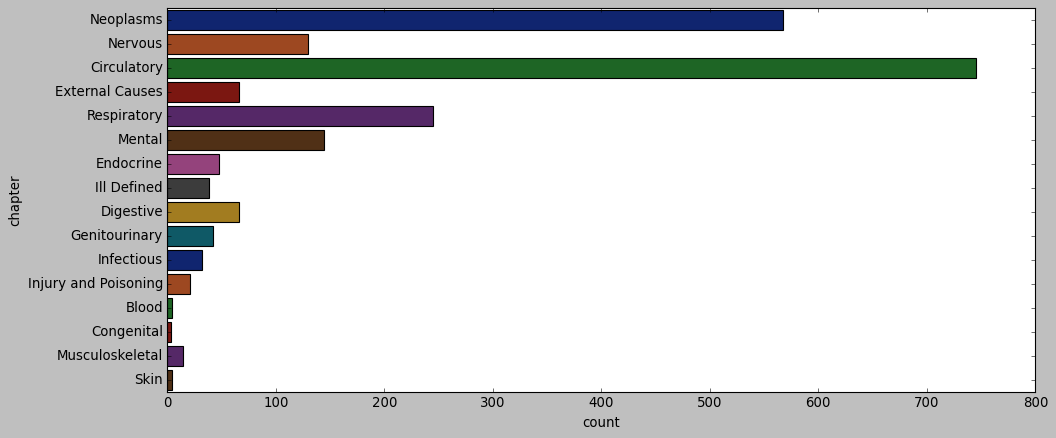

In [16]:
sns.countplot(y="chapter",data=data,palette="dark")
plt.show()

*Since the correlation coefficient of the "creatinine" Attribute with other attributes is low, we subtract the missing "creatinine" data from the data set instead of estimating.*

In [17]:
data.drop(["creatinine","chapter"],axis=1,inplace=True)

In [18]:
data.head()

,age,sex,sample.yr,kappa,lambda,flc.grp,mgus,futime,death
0,55,1,1995,1.51,1.67,7,0,976,1
1,72,1,1995,2.39,2.55,10,0,3316,1
2,66,0,1995,1.01,1.39,4,0,4655,0
3,79,0,1995,1.12,1.36,4,0,4961,0
4,50,0,1995,0.81,0.92,1,0,4774,0


In [19]:
data.isnull().sum()

age          0
sex          0
sample.yr    0
kappa        0
lambda       0
flc.grp      0
mgus         0
futime       0
death        0
dtype: int64

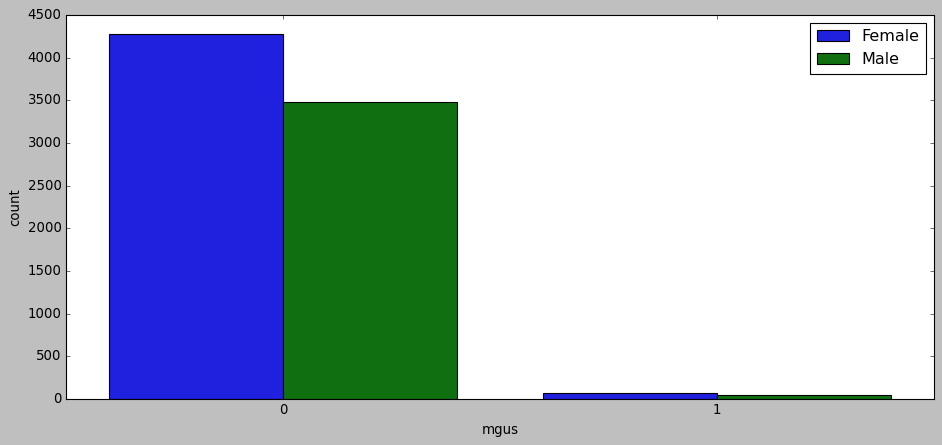

In [20]:
sns.countplot(x="mgus",hue="sex",data=data)
plt.legend({"Female","Male"})
plt.show()

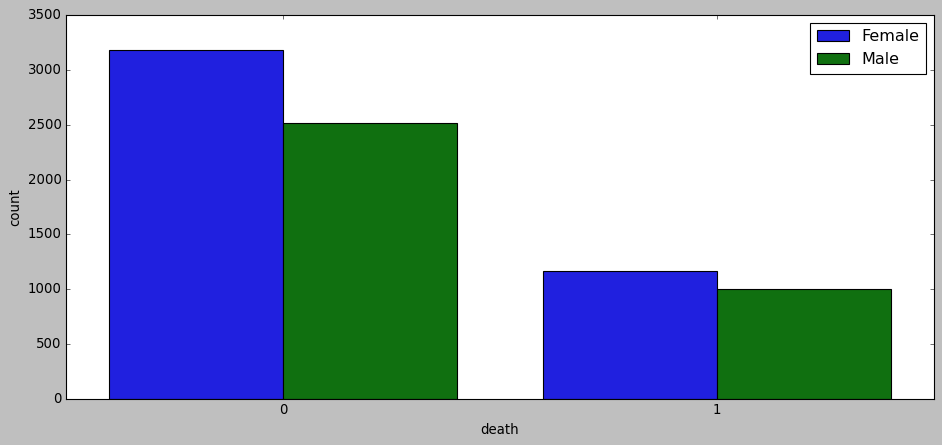

In [21]:
sns.countplot(x="death",hue="sex",data=data)
plt.legend({"Female","Male"})
plt.show()

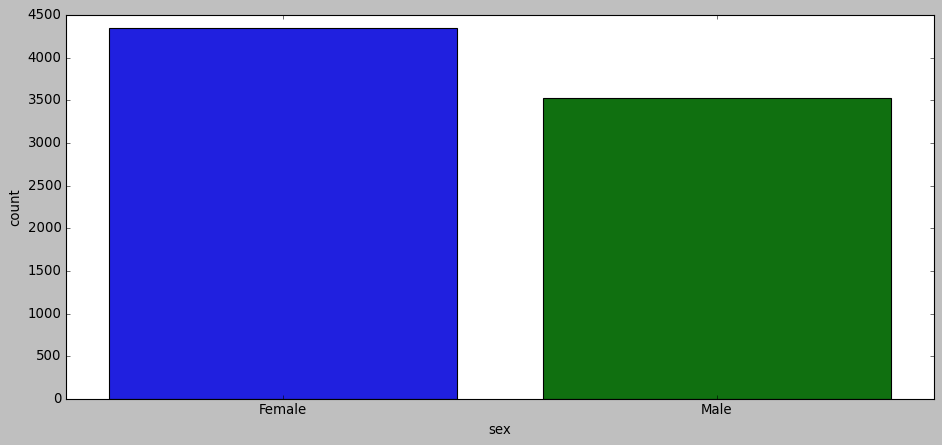

In [22]:
sns.countplot(x="sex",data=data)
plt.xticks([0,1],["Female","Male"])
plt.show()

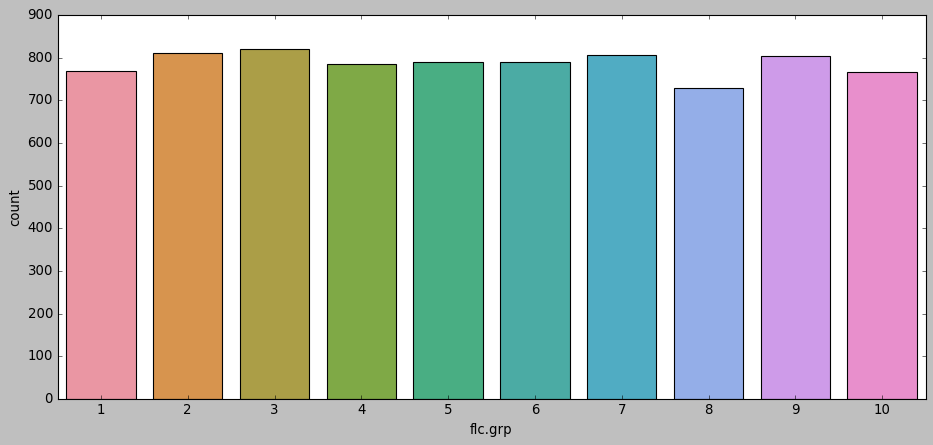

In [23]:
sns.countplot(x="flc.grp",data=data)
plt.show()

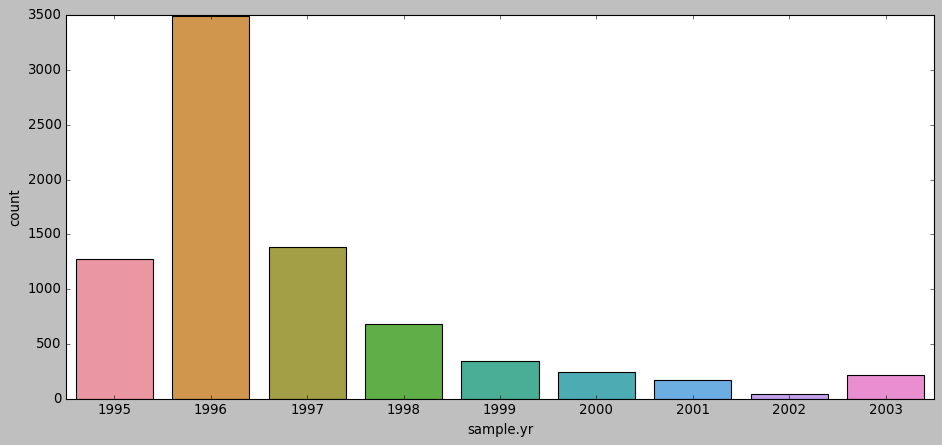

In [24]:
sns.countplot(x="sample.yr",data=data)
plt.show()

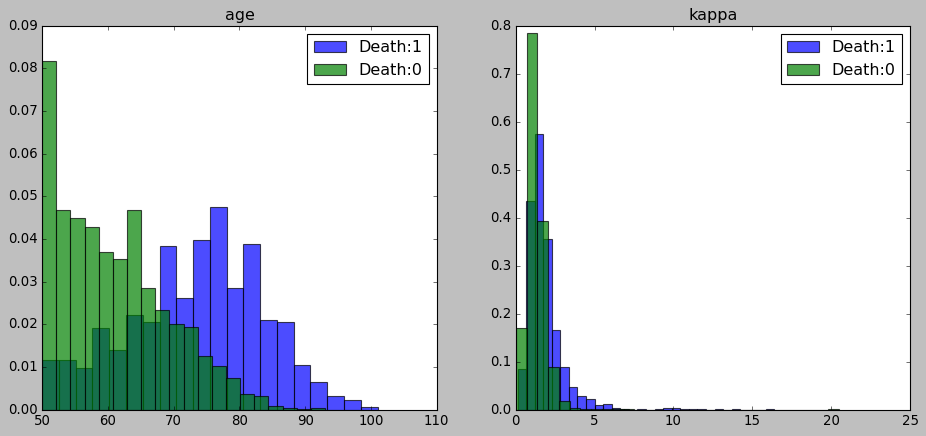

In [25]:
plt.subplot(1,2,1)
plt.hist(data.loc[data["death"]==1]["age"],alpha=0.7,label="Death:1",density=True,bins=20)
plt.hist(data.loc[data["death"]==0]["age"],alpha=0.7,label="Death:0",density=True,bins=20)
plt.legend()
plt.title("age")

plt.subplot(1,2,2)
plt.hist(data.loc[data["death"]==1]["kappa"],alpha=0.7,label="Death:1",density=True,bins=30)
plt.hist(data.loc[data["death"]==0]["kappa"],alpha=0.7,label="Death:0",density=True,bins=30)
plt.title("kappa")
plt.legend()
plt.show()

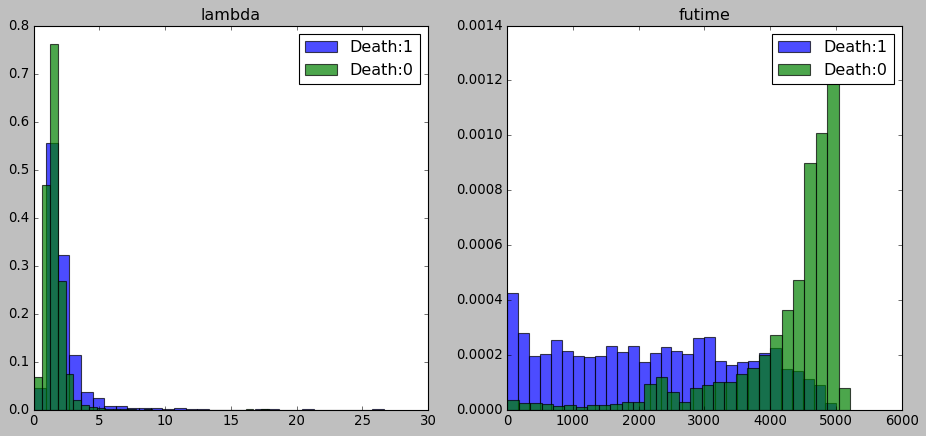

In [26]:
plt.subplot(1,2,1)
plt.hist(data.loc[data["death"]==1]["lambda"],alpha=0.7,label="Death:1",density=True,bins=30)
plt.hist(data.loc[data["death"]==0]["lambda"],alpha=0.7,label="Death:0",density=True,bins=30)
plt.legend()
plt.title("lambda")

plt.subplot(1,2,2)
plt.hist(data.loc[data["death"]==1]["futime"],alpha=0.7,label="Death:1",density=True,bins=30)
plt.hist(data.loc[data["death"]==0]["futime"],alpha=0.7,label="Death:0",density=True,bins=30)
plt.title("futime")
plt.legend()
plt.show()

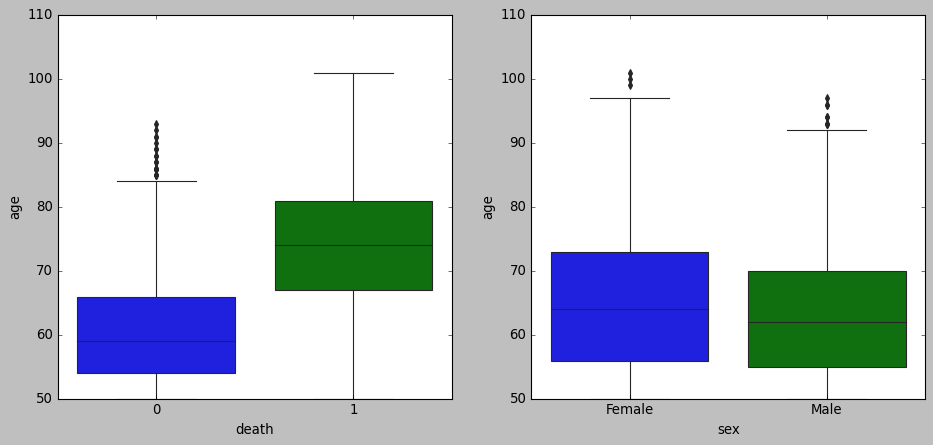

In [27]:
plt.subplot(1,2,1)
sns.boxplot(x="death",y="age",data=data);

plt.subplot(1,2,2)
sns.boxplot(x="sex",y="age",data=data);
plt.xticks([0,1],["Female","Male"])
plt.show()

In [28]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import DiscriminationThreshold

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
X = data.drop("death",axis=1) 
y = data["death"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.35,random_state=42)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


=LogisticRegression=
Test Variable Score: 0.8751814223512336
Accuracy Score     : 0.8751814223512336


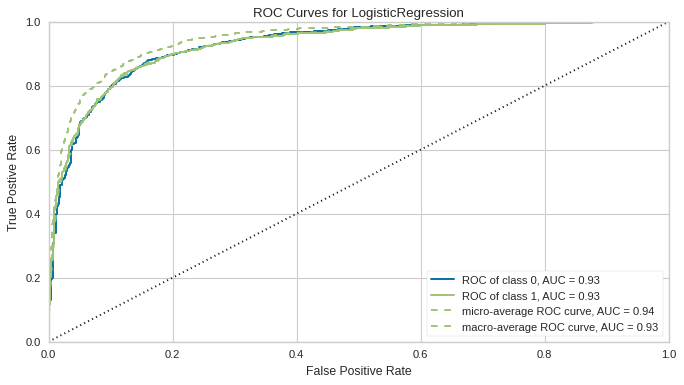

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


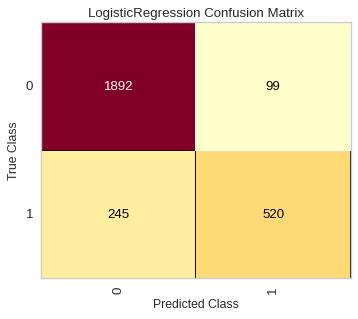

In [30]:
lr = LogisticRegression(solver="lbfgs",max_iter=500)
lr.fit(X_train,y_train)
score = lr.score(X_test,y_test)
pred_lr= lr.predict(X_test)

print("=LogisticRegression=")
print("Test Variable Score:",score)
print("Accuracy Score     :",accuracy_score(y_test,pred_lr))

plt.figure(figsize=(10,5))
visualizer = ROCAUC(lr, classes=[0,1])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

plt.figure(figsize=(5,4))
cm = ConfusionMatrix(lr, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


=GaussianNB=
Test Variable Score: 0.854499274310595
Accuracy Score     : 0.854499274310595


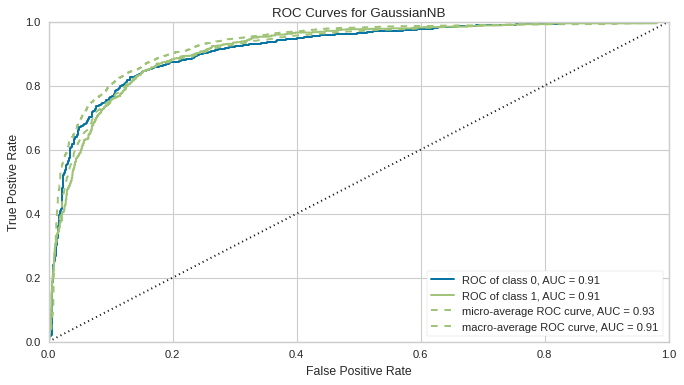

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


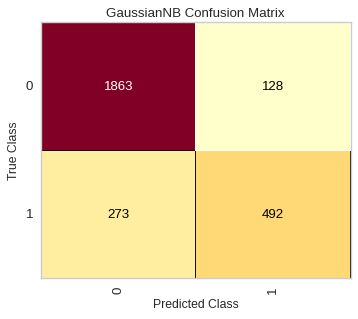

In [31]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
score = gnb.score(X_test,y_test)
pred_knc= gnb.predict(X_test)

print("=GaussianNB=")
print("Test Variable Score:",score)
print("Accuracy Score     :",accuracy_score(y_test,pred_knc))

plt.figure(figsize=(10,5))
visualizer = ROCAUC(gnb, classes=[0,1])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

plt.figure(figsize=(5,4))
cm = ConfusionMatrix(gnb, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

=KNeighborsClassifier=
Test Variable Score: 0.8570391872278664
Accuracy Score     : 0.8570391872278664


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


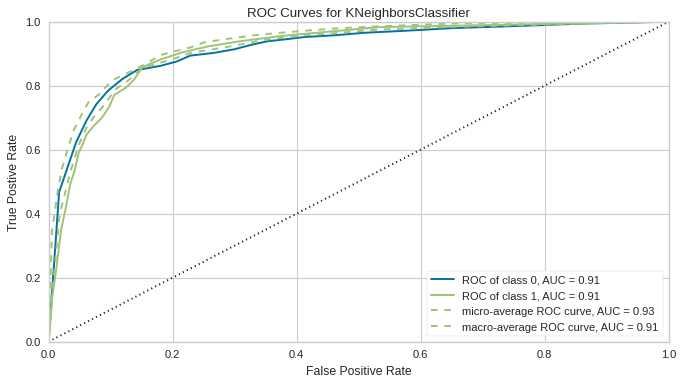

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


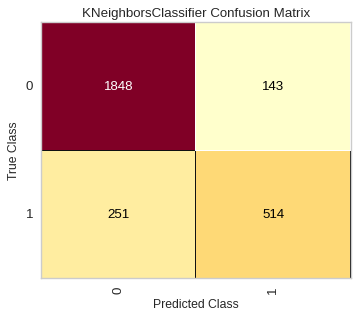

In [32]:
knc = KNeighborsClassifier(n_neighbors=24)
knc.fit(X_train,y_train)
score = knc.score(X_test,y_test)
pred_knc= knc.predict(X_test)

print("=KNeighborsClassifier=")
print("Test Variable Score:",score)
print("Accuracy Score     :",accuracy_score(y_test,pred_knc))

plt.figure(figsize=(10,5))
visualizer = ROCAUC(knc, classes=[0,1])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

plt.figure(figsize=(5,4))
cm = ConfusionMatrix(knc, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

=MLPClassifier=
Test Variable Score: 0.8276487663280117
Accuracy Score     : 0.8276487663280117


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


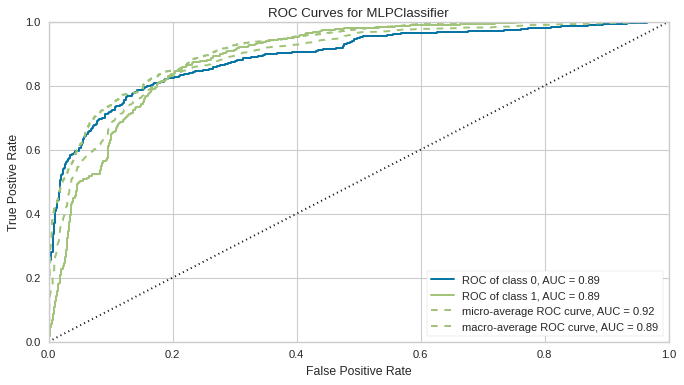

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


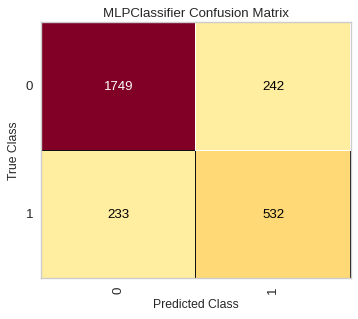

In [33]:
net = MLPClassifier(max_iter=1000,activation="logistic")
net.fit(X_train,y_train)
score = net.score(X_test,y_test)
pred_net= net.predict(X_test)

print("=MLPClassifier=")
print("Test Variable Score:",score)
print("Accuracy Score     :",accuracy_score(y_test,pred_net))

plt.figure(figsize=(10,5))
visualizer = ROCAUC(net, classes=[0,1])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

plt.figure(figsize=(5,4))
cm = ConfusionMatrix(net, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


=DecisionTreeClassifier=
Test Variable Score: 0.8951378809869376
Accuracy Score     : 0.8951378809869376


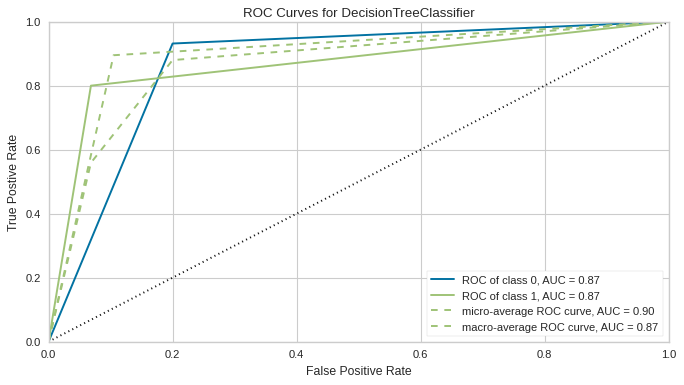

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


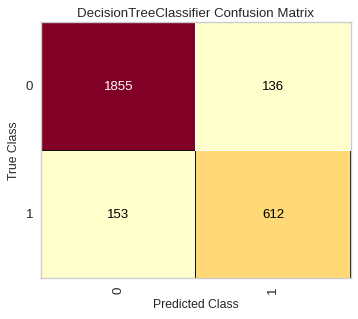

In [34]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
score = dt.score(X_test,y_test)
pred_dt= dt.predict(X_test)

print("=DecisionTreeClassifier=")
print("Test Variable Score:",score)
print("Accuracy Score     :",accuracy_score(y_test,pred_dt))

plt.figure(figsize=(10,5))
visualizer = ROCAUC(dt, classes=[0,1])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

plt.figure(figsize=(5,4))
cm = ConfusionMatrix(dt, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

=GradientBoostingClassifier=
Test Variable Score: 0.8994920174165457
Accuracy Score     : 0.8994920174165457


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


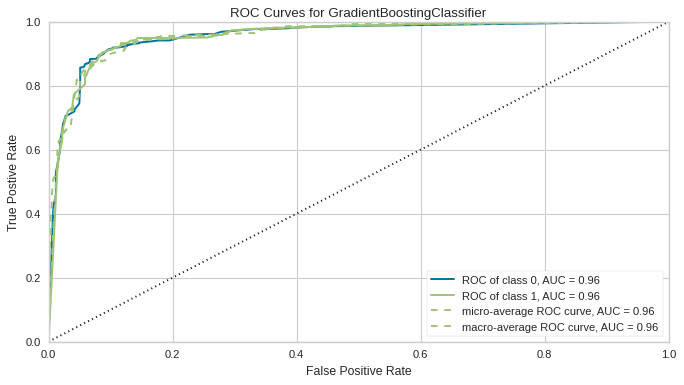

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


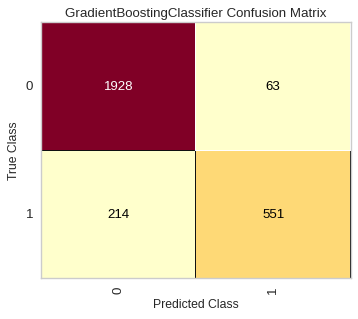

In [35]:
gbc = GradientBoostingClassifier(n_estimators=10,random_state=0)
gbc.fit(X_train,y_train)
score = gbc.score(X_test,y_test)
pred_gbc= gbc.predict(X_test)

print("=GradientBoostingClassifier=")
print("Test Variable Score:",score)
print("Accuracy Score     :",accuracy_score(y_test,pred_gbc))

plt.figure(figsize=(10,5))
visualizer = ROCAUC(gbc, classes=[0,1])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

plt.figure(figsize=(5,4))
cm = ConfusionMatrix(gbc, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

=XGBRFClassifier=
Test Variable Score: 0.9227140783744557
Accuracy Score     : 0.9227140783744557


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


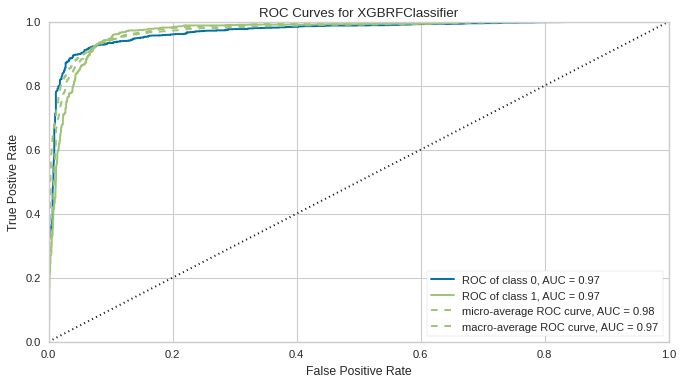

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


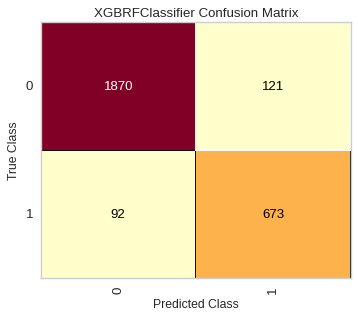

In [36]:
xg = XGBRFClassifier(learning_rate=0.0001,objective="binary:logistic").fit(X_train,y_train)
xg.score(X_test,y_test)
score = xg.score(X_test,y_test)
pred_xg= xg.predict(X_test)

print("=XGBRFClassifier=")
print("Test Variable Score:",score)
print("Accuracy Score     :",accuracy_score(y_test,pred_xg))

plt.figure(figsize=(10,5))
visualizer = ROCAUC(xg, classes=[0,1])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

plt.figure(figsize=(5,4))
cm = ConfusionMatrix(xg, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

# RESULT

*The algorithm performance for classifying "XGBRF Classifier" dataset is higher than other classification algorithms.*